<font color = "#4477AA" ><b><h1>Obesity Level Prediction</h1></b> 

## <font color = "#4477AA" >Introduction:

Obesity is a growing global health concern, with significant implications for individuals and societies alike. It is associated with numerous chronic diseases, reduced quality of life, and increased healthcare costs. In order to address this issue effectively, it is crucial to understand the factors contributing to obesity and develop accurate predictive models that can identify individuals at risk. This data science project aims to build a predictive model for obesity using various demographic, lifestyle, and health-related variables.

## <font color = "#4477AA" >Objective:

The objective of this project is to develop a robust predictive model that can accurately identify individuals at risk of obesity. By analyzing a comprehensive dataset containing information on demographics, lifestyle choices, dietary habits, physical activity levels, and health conditions, we aim to uncover the key factors influencing obesity. The predictive model will utilize advanced machine learning algorithms to analyze the relationships between these variables and predict the likelihood of an individual being obese. The ultimate goal is to provide valuable insights that can inform public health interventions and personalized strategies for preventing and managing obesity on an individual level.


## <font color = "#4477AA" >About Dataset

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 23% of the data was collected directly from users through a survey conducted by Fabio Mendoza Palechor and Alexis de la Hoz Manotas in a web platform and 77% of the data was generated synthetically using the Weka tool and the SMOTE filter.

The data contains 19 attributes and 2111 records.


## <font color = "#4477AA" >Features explanation





`Gender` is 1 if a respondent is male and 0 if a respondent is female.

`Age` is a respondent’s age in years.

`family_history_with_overweight` is 1 if a respondent has family member who is or was overweight, 0 if not.

`FAVC` is 1 if a respondent eats high caloric food frequently, 0 if not.

`FCVC` is 1 if a respondent usually eats vegetables in their meals, 0 if not.

`NCP` represents how many main meals a respondent has daily (0 for 1-2 meals, 1 for 3 meals, and 2 for more than 3 meals).

`CAEC` represents how much food a respondent eats between meals on a scale of 0 to 3.

`SMOKE` is 1 if a respondent smokes, 0 if not.

`CH2O` represents how much water a respondent drinks on a scale of 0 to 2.

`SCC` is 1 if a respondent monitors their caloric intake, 0 if not.

`FAF` represents how much physical activity a respondent does on a scale of 0 to 3.

`TUE` represents how much time a respondent spends looking at devices with screens on a scale of 0 to 2.

`CALC` represents how often a respondent drinks alcohol on a scale of 0 to 3.

`Automobile, Bike, Motorbike, Public_Transportation, and Walking` indicate a respondent’s primary mode of transportation. Their primary mode of transportation is indicated by a 1 and the other columns will contain a 0.

`NObeyesdad` is a 1 if a patient is obese and a 0 if not.



# <h3>Importing libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


<h3>Loading the dataset</h3>

In [2]:
path = "obesity.csv"
df = pd.read_csv(path)
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


<h3>Basic insights of dataset</h3>

In [3]:
df.shape

(2111, 19)

In [4]:
df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking',
       'NObeyesdad'],
      dtype='object')

In [5]:
df.dtypes

Gender                              int64
Age                               float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
Automobile                          int64
Bike                                int64
Motorbike                           int64
Public_Transportation               int64
Walking                             int64
NObeyesdad                          int64
dtype: object

In [6]:
# define categoric and numerical columns
categorical_variables = [col for col in df.columns if df[col].nunique() < 10 and 
                        df[col].dtype == "object"]
numeric_variables = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

print("Categorical variables:", categorical_variables)
print("  "*15)
print("Numeric variables:", numeric_variables)

Categorical variables: []
                              
Numeric variables: ['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking', 'NObeyesdad']


## Checking for missing values and duplicates

In [7]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing#'] = df.isna().sum()
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing#,Duplicates,Unique,Count
Gender,int64,0,29,2,2111
Age,float64,0,29,1402,2111
family_history_with_overweight,int64,0,29,2,2111
FAVC,int64,0,29,2,2111
FCVC,float64,0,29,810,2111
NCP,float64,0,29,635,2111
CAEC,int64,0,29,4,2111
SMOKE,int64,0,29,2,2111
CH2O,float64,0,29,1268,2111
SCC,int64,0,29,2,2111


## Summary Statistics

In [8]:
Quantitative_features = df[["Age"]]
Qualitative_features = df.drop("Age", axis = 1)

In [9]:
Quantitative_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.3126,6.345968,14.0,19.947192,22.77789,26.0,61.0


In [10]:
def value_counts(dataframe):
    for i in dataframe :
        print("\n"+ "For " + i)
        print(dataframe[i].value_counts())
        print("_______________________________")
print(value_counts(Qualitative_features))


For Gender
1    1068
0    1043
Name: Gender, dtype: int64
_______________________________

For family_history_with_overweight
1    1726
0     385
Name: family_history_with_overweight, dtype: int64
_______________________________

For FAVC
1    1866
0     245
Name: FAVC, dtype: int64
_______________________________

For FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: FCVC, Length: 810, dtype: int64
_______________________________

For NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: NCP, Length: 635, dtype: int64
_______________________________

For CAEC
1    1765
2     242
3      53
0      51
Name: CAEC, dtype: int64
_______________________________

For SMOKE
0    2067
1      44
Name: SMOKE, dtype: int6

# <font  ><b><h3>Data preprocessing</h3></b>

In [11]:
# Data Preprocessing - Rounding Data
## Makes the following columns match up more with the data description
round_cols = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
# Round in-place
df[round_cols] = df[round_cols].round()
# Print value counts for all features
print(value_counts(df[round_cols]))


For FCVC
2.0    1013
3.0     996
1.0     102
Name: FCVC, dtype: int64
_______________________________

For NCP
3.0    1470
1.0     316
2.0     176
4.0     149
Name: NCP, dtype: int64
_______________________________

For CH2O
2.0    1110
3.0     516
1.0     485
Name: CH2O, dtype: int64
_______________________________

For FAF
1.0    776
0.0    720
2.0    496
3.0    119
Name: FAF, dtype: int64
_______________________________

For TUE
0.0    952
1.0    915
2.0    244
Name: TUE, dtype: int64
_______________________________
None


## Dealing with duplicates

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(1964, 19)

# EDA

## Distribution of the target variable

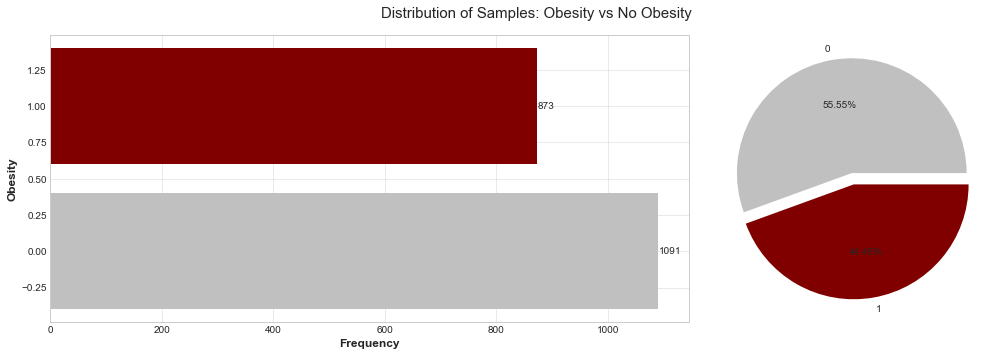

In [13]:
y = df['NObeyesdad'].value_counts()
colors = ["Silver", "maroon"]
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})


axes[0].barh(y=y.index, width=y.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Obesity')
axes[0].grid(alpha=0.5)
for index, values in enumerate(y):
    axes[0].text(values+1, index, str(values), va='center')

axes[1].pie(y.values, labels=y.index, autopct='%.2f%%', explode=([0.05]*len(y.index)), colors=colors)

    

figure.suptitle('Distribution of Samples: Obesity vs No Obesity', fontsize=15)
plt.tight_layout(pad=1)
plt.show()


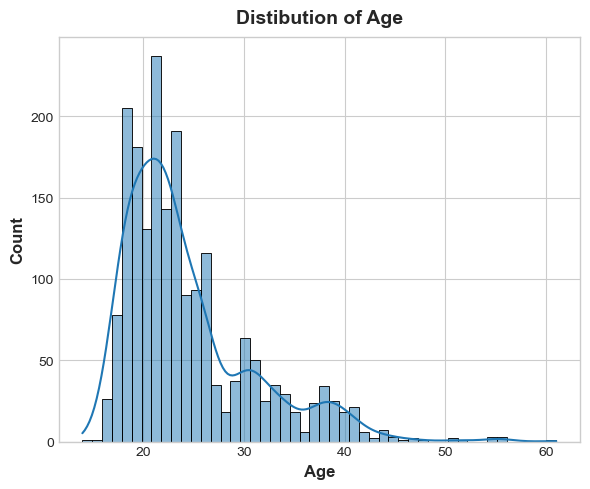

In [14]:
def plot_hist(df, cols, kde = True):
    for col in cols:
        plt.figure(figsize=(6, 5), dpi=100)
        sns.histplot(data=df, x = df[col], kde = kde)
        plt.title("Distibution of " + col)
        plt.xlabel(col)
        
        plt.show() 
plot_hist(df, Quantitative_features )

In [15]:
cat_cols = [col for col in df.columns if df[col].nunique() < 10 ]

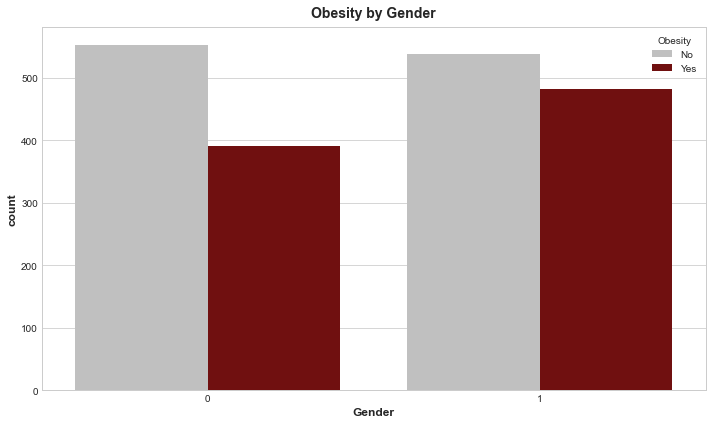

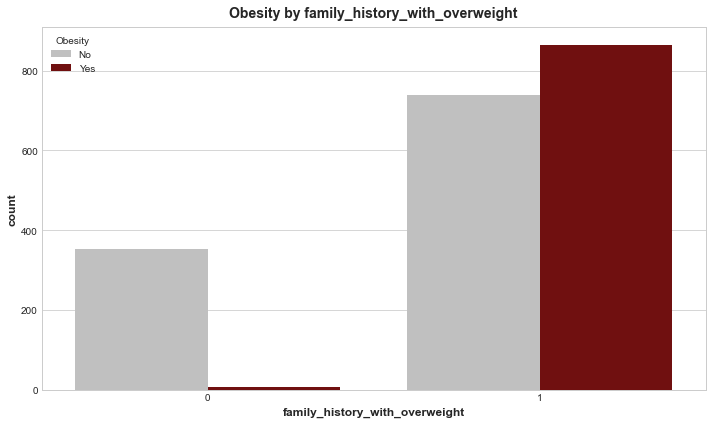

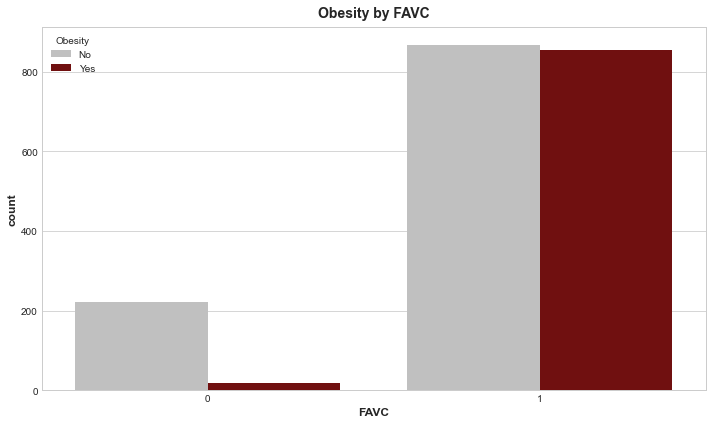

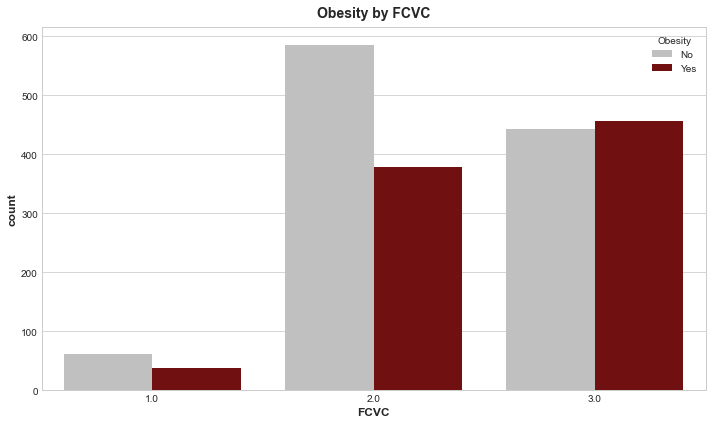

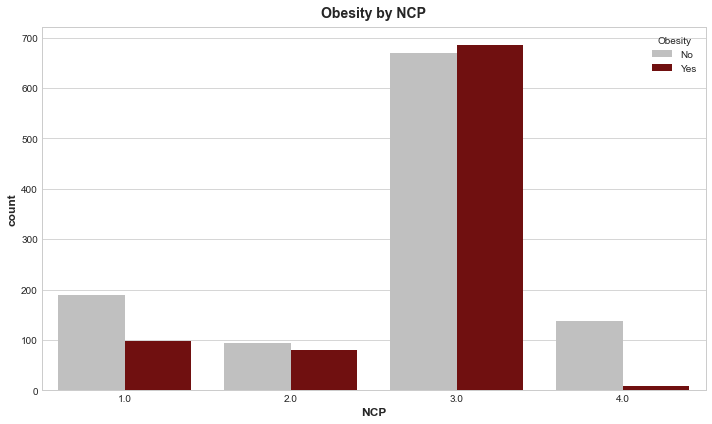

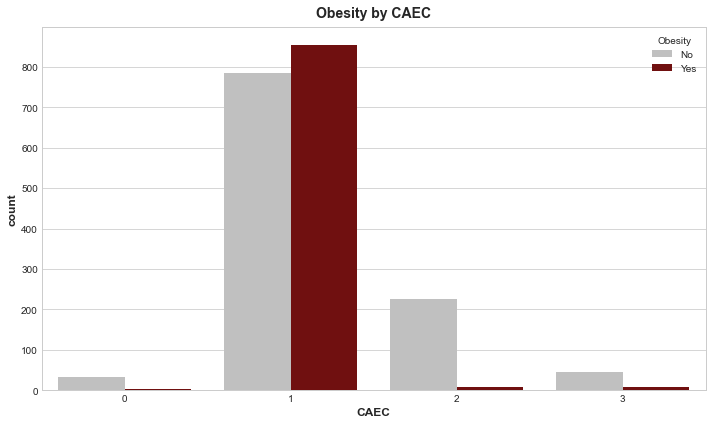

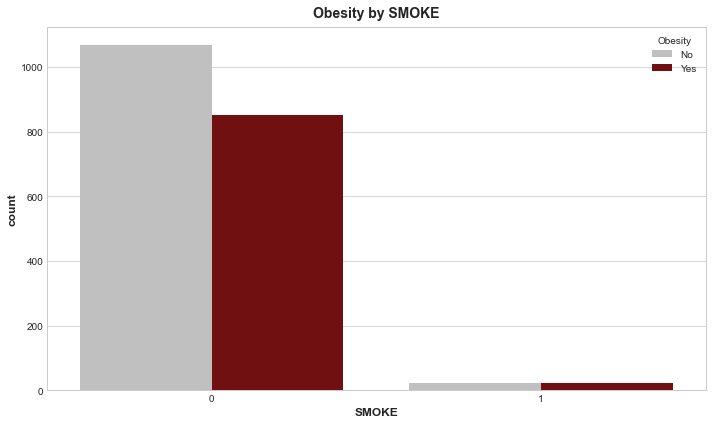

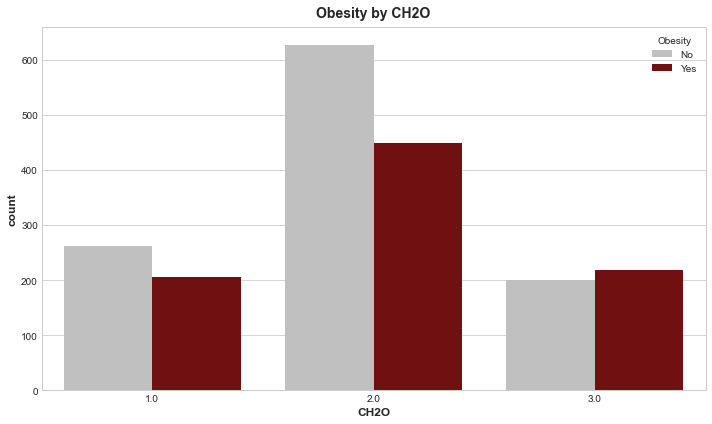

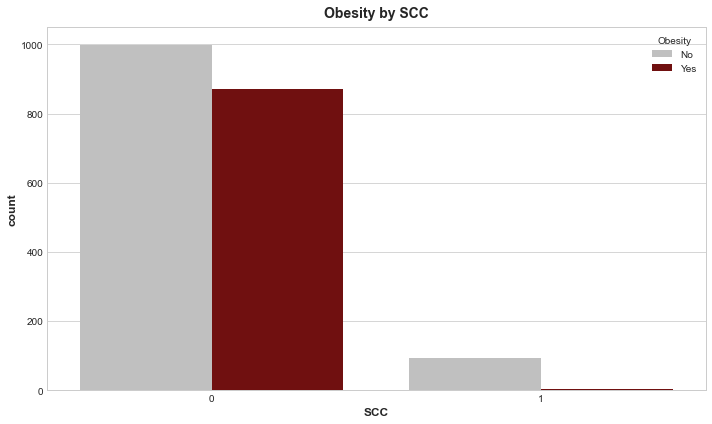

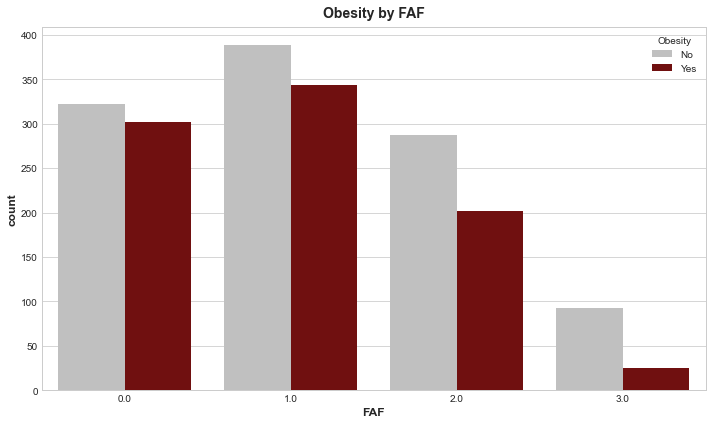

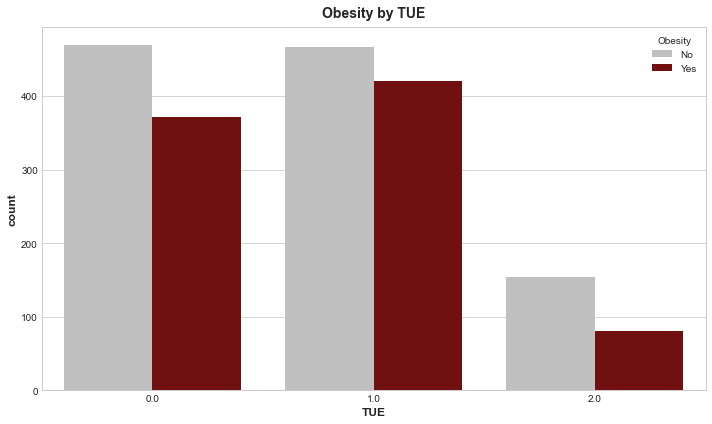

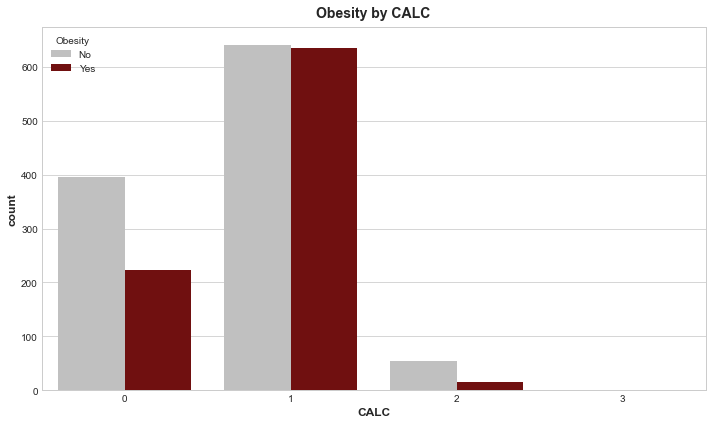

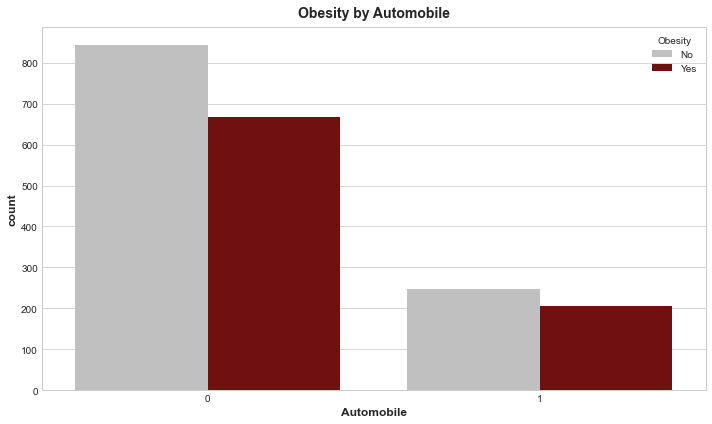

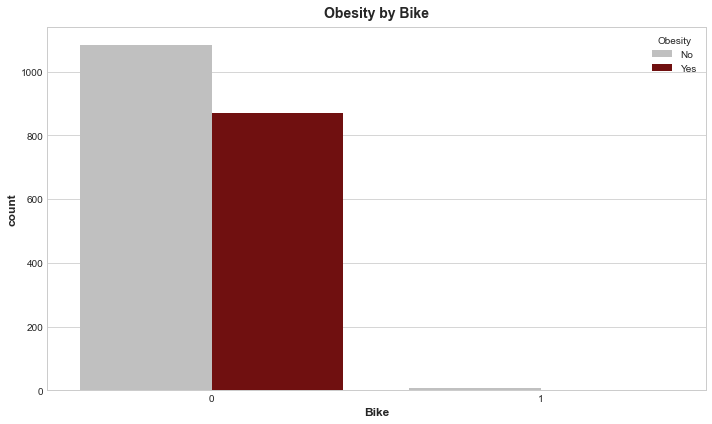

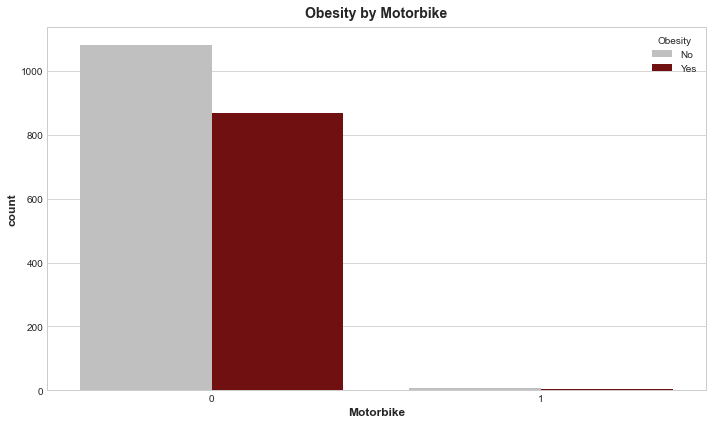

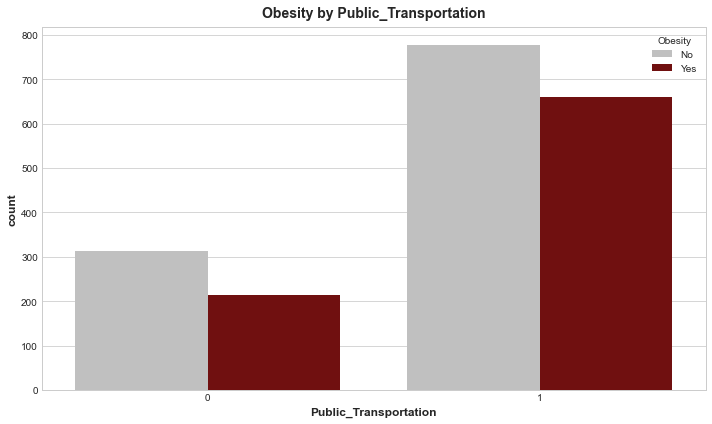

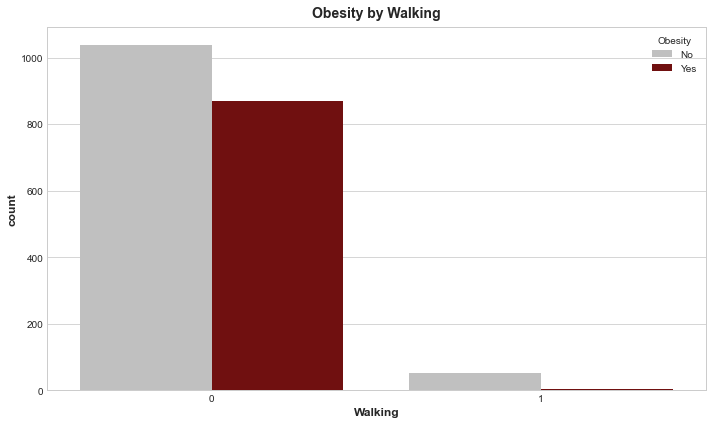

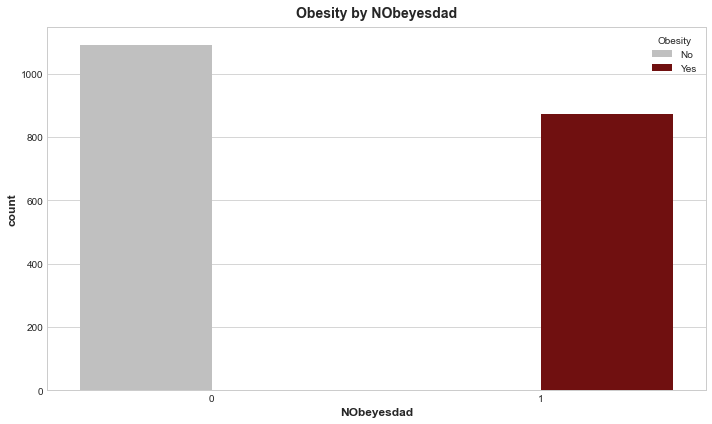

In [16]:
def plot_bar(df, cols,hue='NObeyesdad', palette=colors):
    for col in cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[col], hue=hue, data=df, palette=palette)
        plt.title('Obesity by '+ col)
        plt.xlabel(col)
        plt.legend(title='Obesity', labels=['No', 'Yes'])
        plt.show()
plot_bar(df, cat_cols)

## Correlation

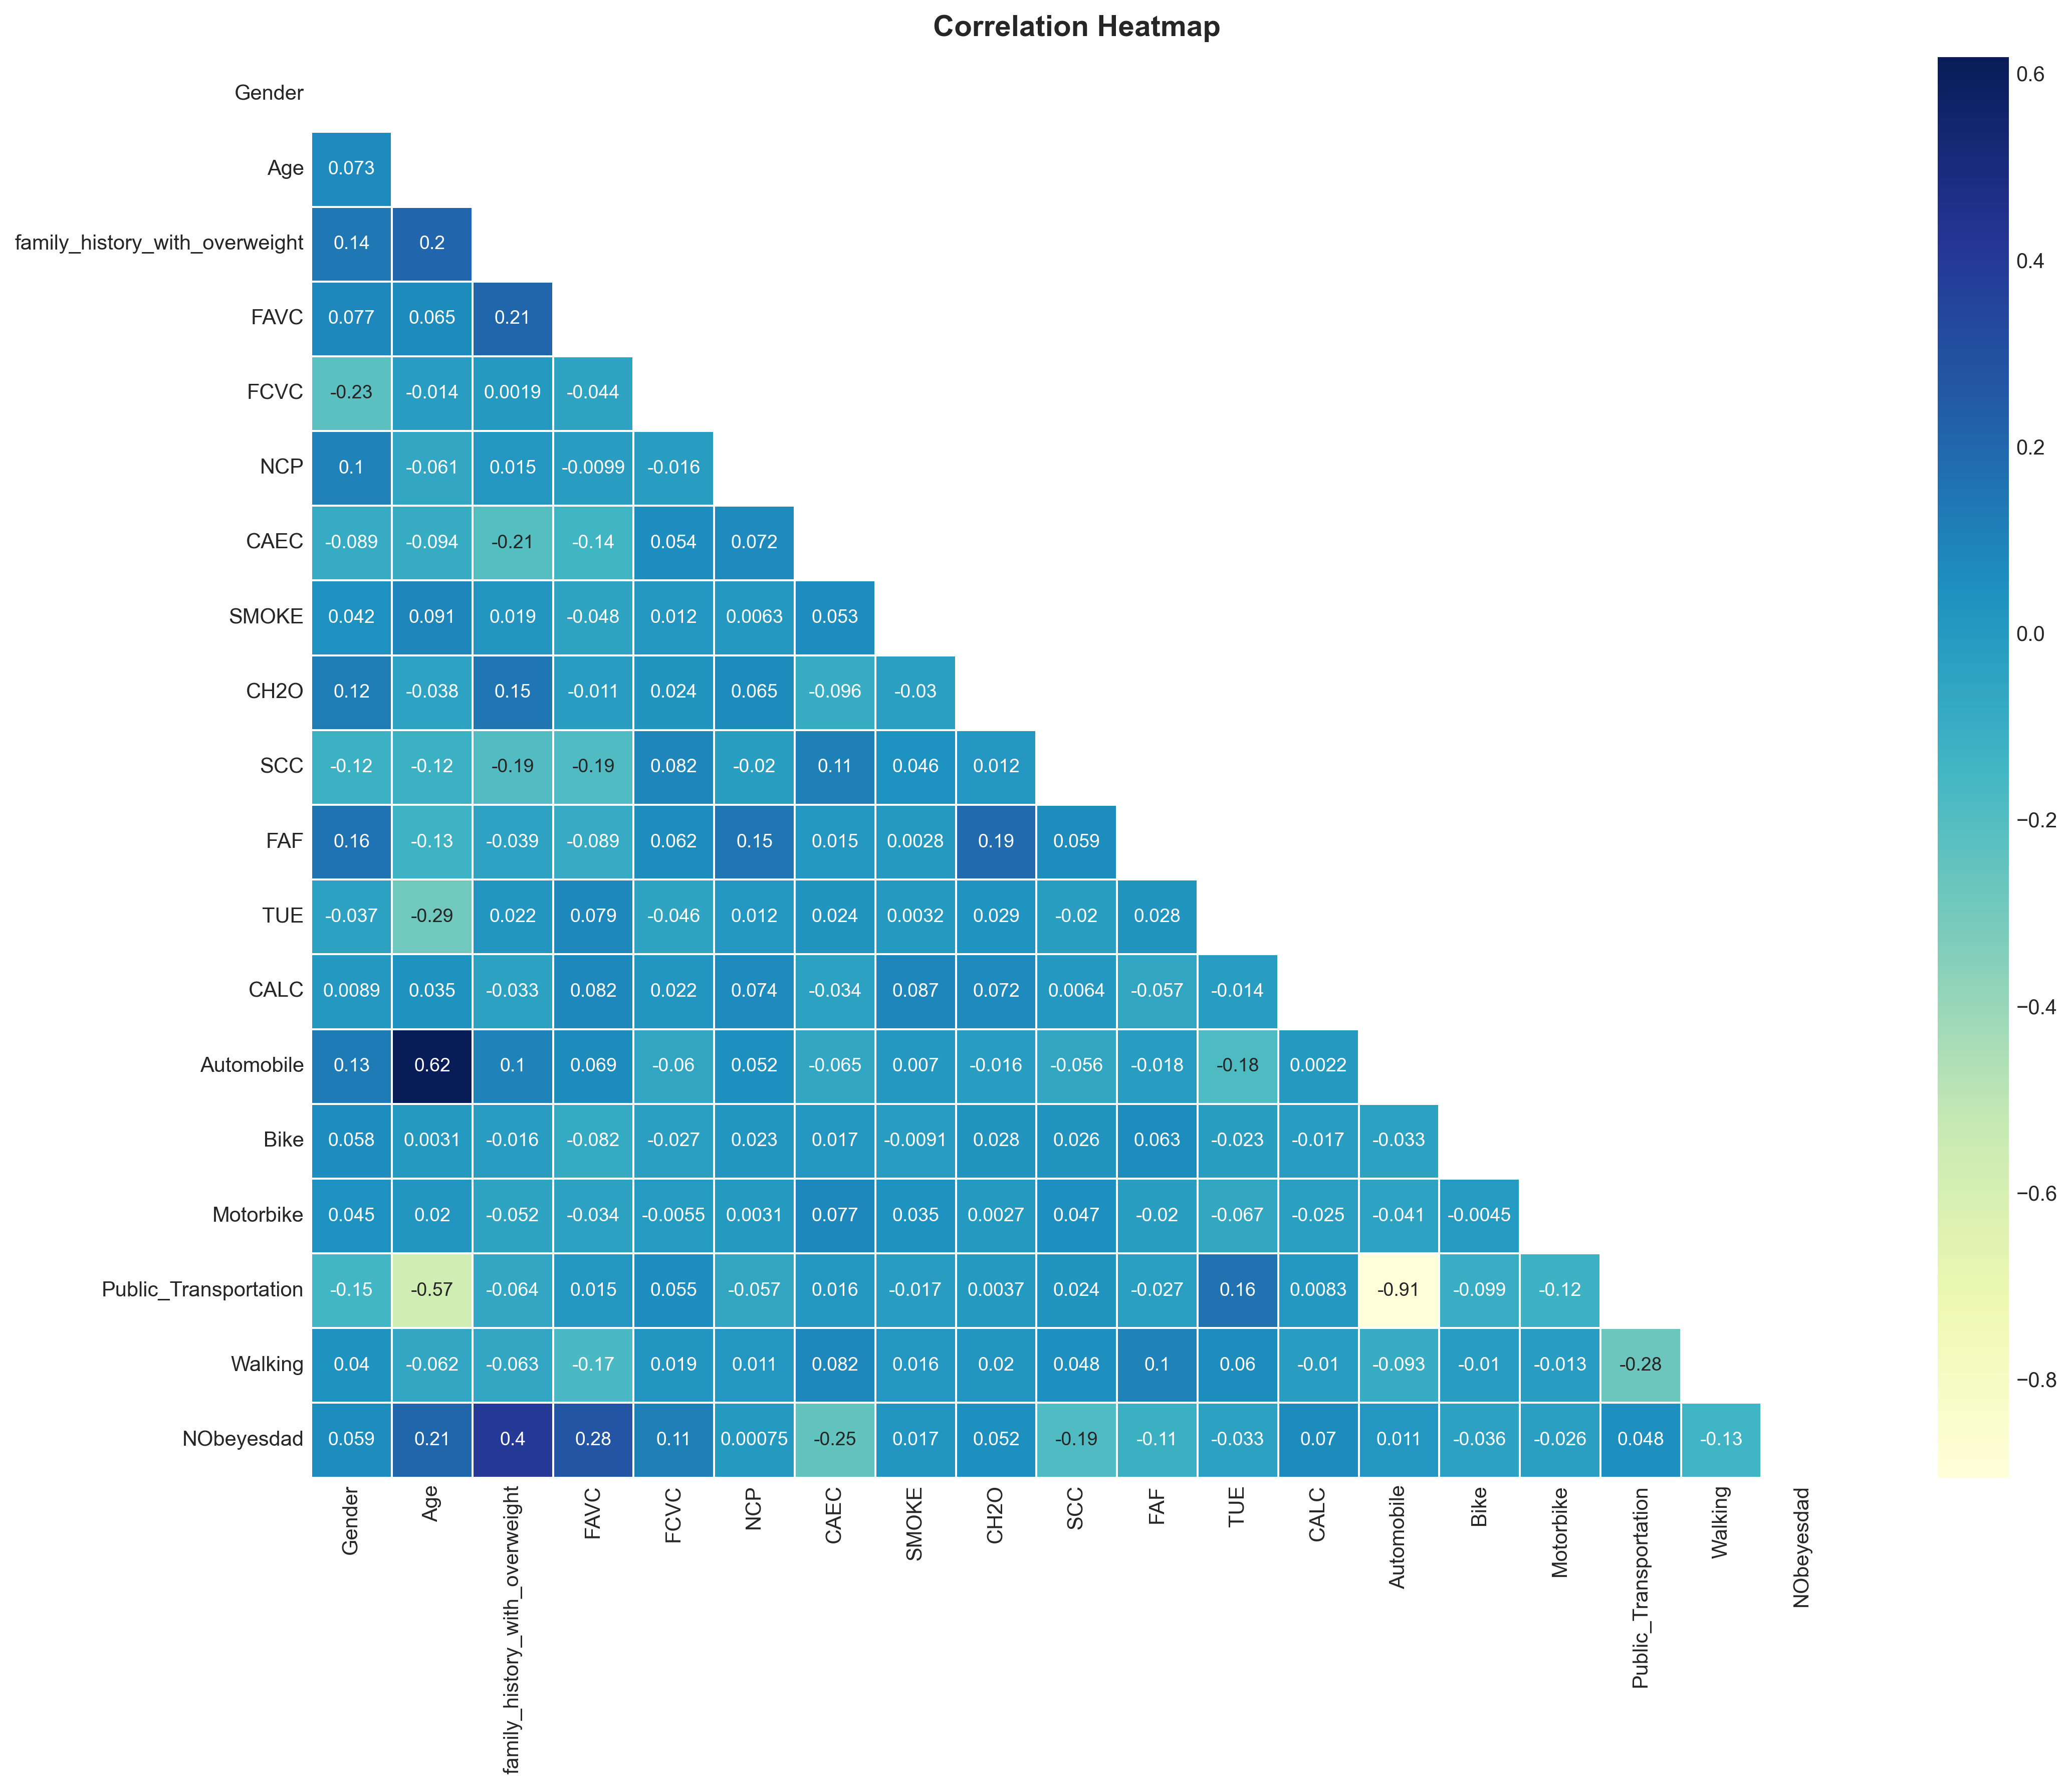

In [17]:
# Plot correlation heatmap
plt.figure(figsize=(15, 12), dpi=300)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='YlGnBu', linewidth=.5, annot_kws={'size': 9})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Features selection

In [18]:
y = df['NObeyesdad']
x=df.drop('NObeyesdad',axis=1)

In [19]:
discrete_features = x.dtypes == int

In [20]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(x,y,discrete_features):
    mi_scores = mutual_info_classif(x,y,discrete_features =discrete_features )
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = x.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
mi_scores =  make_mi_scores(x,y,discrete_features) 
mi_scores

Age                               0.178452
family_history_with_overweight    0.107293
CAEC                              0.069308
FAVC                              0.045810
NCP                               0.035346
SCC                               0.032690
FAF                               0.025097
Public_Transportation             0.021564
CALC                              0.017998
TUE                               0.011518
Bike                              0.011497
Motorbike                         0.010895
CH2O                              0.009766
Walking                           0.008552
Gender                            0.006389
FCVC                              0.002876
Automobile                        0.000000
SMOKE                             0.000000
Name: MI Scores, dtype: float64

In [21]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.0]
x = drop_uninformative(x, mi_scores)

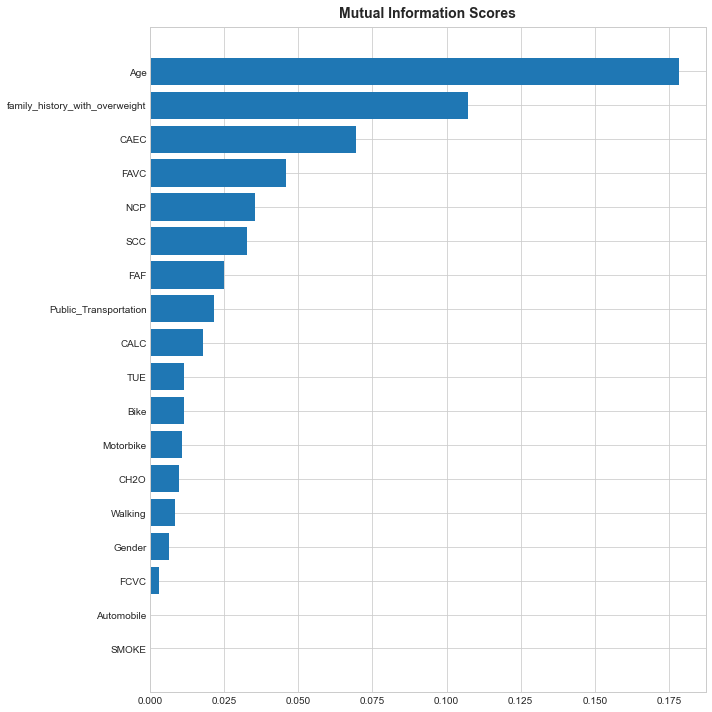

In [22]:
def plot_mi_scores(scores):
    fig, ax = plt.subplots(figsize=(10,10))
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    
plot_mi_scores(mi_scores)

## train_test_split

In [23]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,shuffle =True)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 590
number of training samples: 1374


In [24]:
# X_train Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(df_scaled, columns = x_train.columns)

# X_valid Scaling
df_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(df_scaled, columns = x_test.columns)
x_test.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Gender,590.0,0.013,1.000,-1.036,-1.036,0.966,0.966,0.966
Age,590.0,0.021,1.036,-1.605,-0.711,-0.252,0.370,4.798
family_history_with_overweight,590.0,0.009,0.993,-2.100,0.476,0.476,0.476,0.476
FAVC,590.0,0.041,0.952,-2.618,0.382,0.382,0.382,0.382
FCVC,590.0,0.016,0.982,-2.383,-0.686,-0.686,1.012,1.012
NCP,590.0,0.071,0.984,-2.061,0.398,0.398,0.398,1.628
CAEC,590.0,0.003,1.006,-2.457,-0.328,-0.328,-0.328,3.929
CH2O,590.0,-0.016,0.960,-1.441,0.031,0.031,0.031,1.503
SCC,590.0,-0.039,0.917,-0.232,-0.232,-0.232,-0.232,4.316
FAF,590.0,0.105,1.021,-1.149,-1.149,-0.026,1.097,2.220


## Helping functions

### Plotting Confusion Matrix and Classification Report

In [25]:
from sklearn import metrics
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred,normalize='true')
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap='YlGnBu', ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=20)
    ax[0].xaxis.set_ticklabels(['No', 'Yes'])
    ax[0].yaxis.set_ticklabels(['No', 'Yes'])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='YlGnBu', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=20)
    plt.show()

In [26]:
from sklearn.metrics import roc_curve, auc

def roc(model,y_pred):
    # Predict the probabilities of the positive class
    y_pred = model.predict_proba(x_test)[:,1]
    y_pred.shape

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate the AUC score
    auc_score = auc(fpr, tpr)
    x1=np.linspace(0,1,100)
    # Plot the ROC curve
    fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
    plt.plot(x1,x1,label='baseline')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve for binary classification")
    plt.legend()
    plt.show()

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()

In [28]:
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=4).fit(x_train, y_train)

In [29]:
print('Tuned hyperparameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyperparameters :  {'C': 0.1, 'class_weight': 'balanced', 'solver': 'lbfgs'}
accuracy :  0.7510911756729269


In [30]:
best_model = lr_cv.best_estimator_

In [31]:
yhat_train = best_model.predict(x_train)
yhat_test = best_model.predict(x_test)

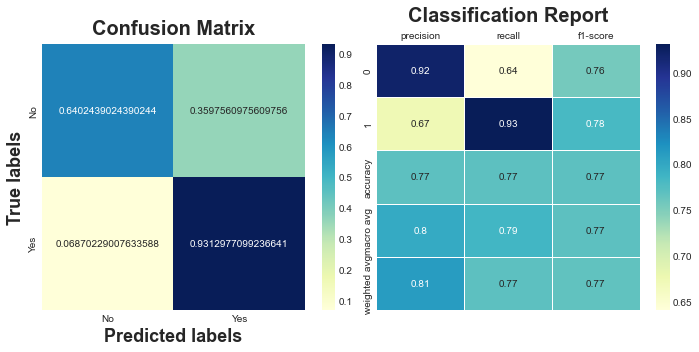

In [32]:
clf_plot(yhat_test)

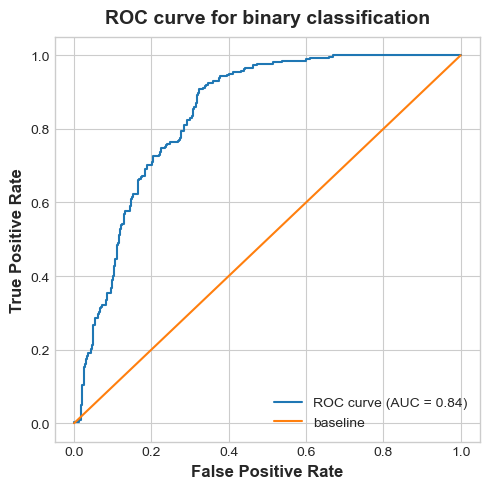

In [33]:
roc(best_model,yhat_test)

## GaussianNB

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print("Accuracy: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test,y_pred))
print("Recall score: %.3f"%recall_score(y_test,y_pred))
print("F1 score: %.3f"%f1_score(y_test,y_pred))

Accuracy: 0.692
Precision score: 0.593
Recall score: 0.977
F1 score: 0.738


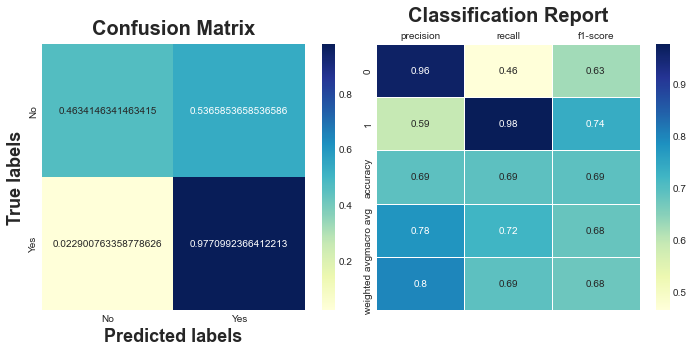

In [36]:
clf_plot(y_pred)

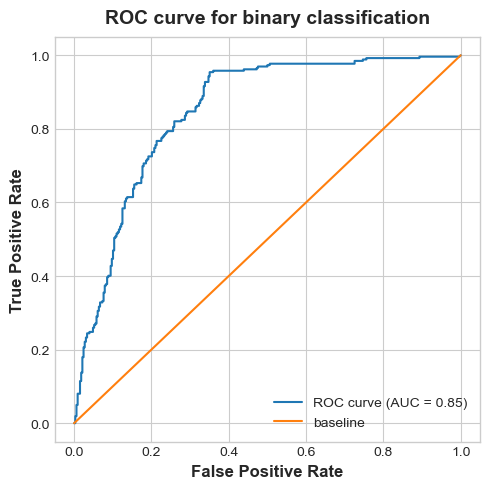

In [37]:
roc(model,y_pred)

## Random Forest Classifier

In [38]:
# RFC
rfc = RandomForestClassifier(max_depth=22, n_estimators=100, random_state=1).fit(x_train, y_train)
yhat_test1 = rfc.predict(x_test)


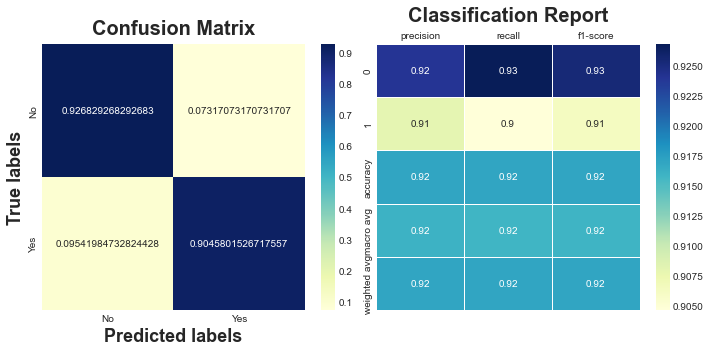

In [39]:
clf_plot(yhat_test1)

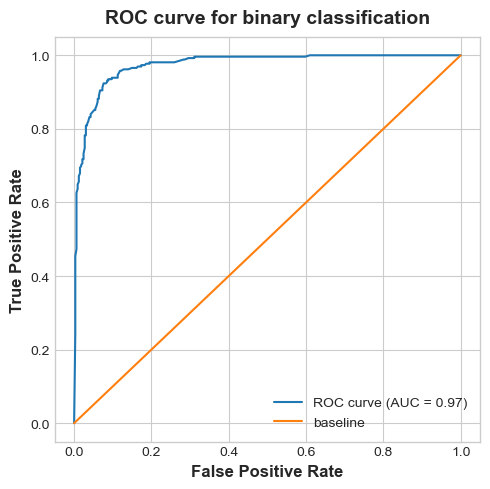

In [40]:
roc(rfc,yhat_test1)

## KNeighbors Classifier

In [41]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(x_train, y_train)
yhat_test2 = knn.predict(x_test)

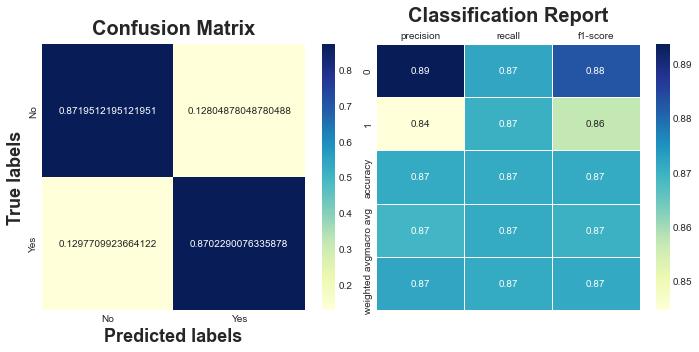

In [42]:
clf_plot(yhat_test2)

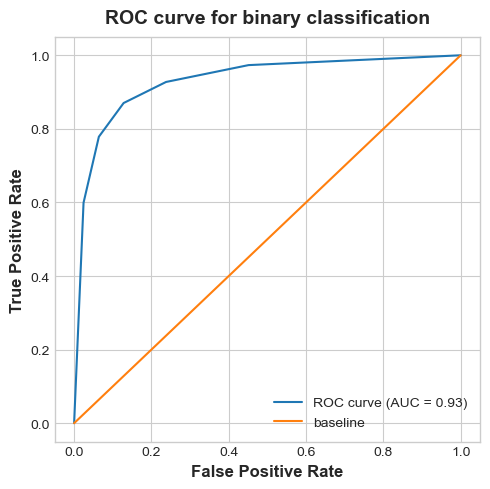

In [43]:
roc(knn,yhat_test2)

## SVC

In [44]:
from sklearn.svm import SVC


svc = SVC(class_weight='balanced')
svc.fit(x_train, y_train)
y_val_pred = svc.predict(x_test)

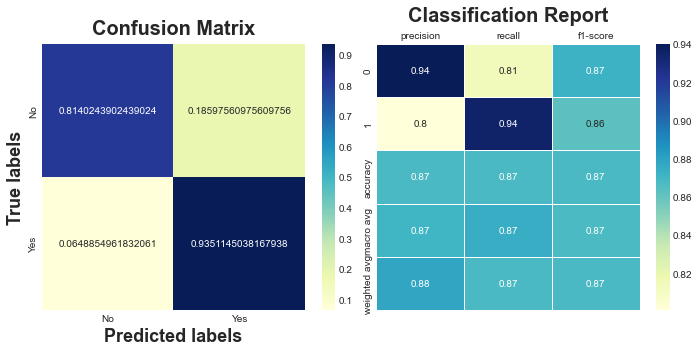

In [45]:
clf_plot(y_val_pred)

## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)
tree.fit(x_train, y_train)
y_val_pred2 = tree.predict(x_test)

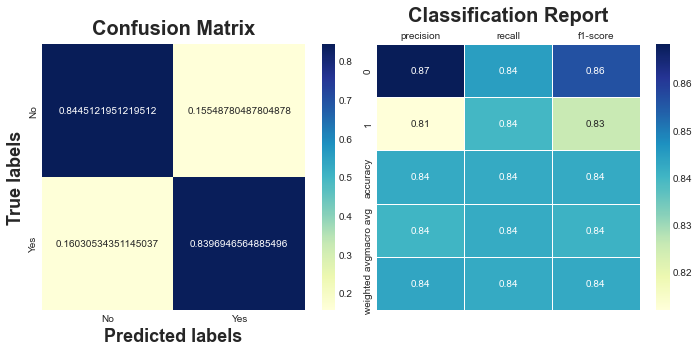

In [47]:
clf_plot(y_val_pred2)

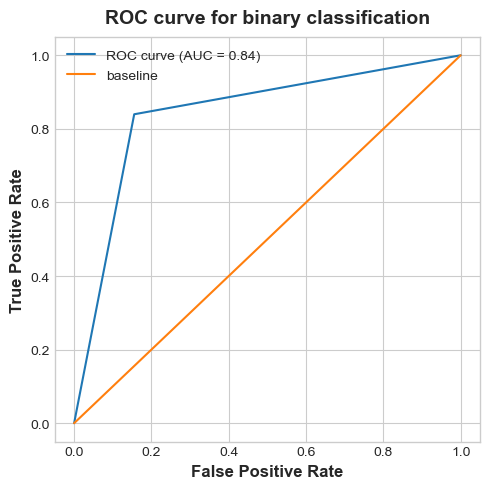

In [48]:
roc(tree,y_val_pred2)

## Conclusion

### Comparing models performance

In [49]:
def measure_error(y_test, y_pred, label):
    return pd.Series({"Accuracy": accuracy_score(y_test, y_pred),
                     "Precision": precision_score(y_test, y_pred),
                     "Recall": recall_score(y_test, y_pred),
                     "F1": f1_score(y_test, y_pred),
                     "AUROC": roc_auc_score(y_test, y_pred)}, 
                     name = label)

In [50]:
Log_reg = pd.concat([measure_error(y_test, yhat_test,"Log_reg")],axis = 1)
GaussianNB = pd.concat([measure_error(y_test, y_pred,"GaussianNB")],axis = 1)
RFC = pd.concat([measure_error(y_test, yhat_test1,"RFC")],axis = 1)
KNN = pd.concat([measure_error(y_test, yhat_test2,"KNN")],axis = 1)
SVC = pd.concat([measure_error(y_test, y_val_pred,"SVC")],axis = 1)
DT = pd.concat([measure_error(y_test, y_val_pred2,"DT")],axis = 1)

In [51]:
compare_models =  pd.concat([Log_reg,GaussianNB,RFC,KNN,SVC,DT],axis =1)
compare_models.style.background_gradient(cmap='Blues')

,Log_reg,GaussianNB,RFC,KNN,SVC,DT
Accuracy,0.769492,0.691525,0.916949,0.871186,0.867797,0.842373
Precision,0.674033,0.592593,0.908046,0.844444,0.800654,0.811808
Recall,0.931298,0.977099,0.904580,0.870229,0.935115,0.839695
F1,0.782051,0.737752,0.906310,0.857143,0.862676,0.825516
AUROC,0.785771,0.720257,0.915705,0.871090,0.874569,0.842103


## Result :

### Based on the above output, best algorithm base on F1 Score is : Random Forest Classifier

## Optimizing the best model performance

In [53]:
from sklearn.model_selection import GridSearchCV
# create a Random Forest Classifier
forest = RandomForestClassifier(class_weight='balanced_subsample',random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(x_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest_selected = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy:  0.8959230258792301


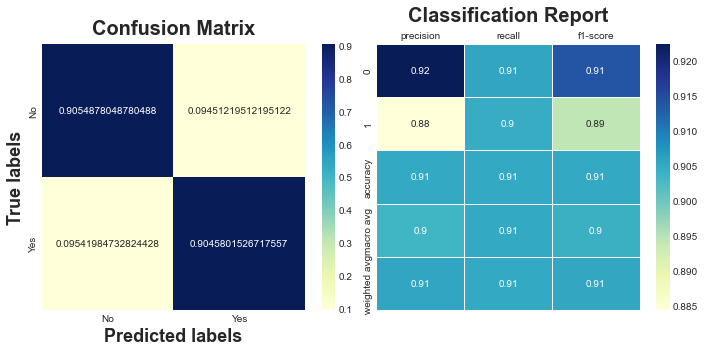

In [54]:
yhat_train = best_forest_selected.predict(x_train)
yhat_test = best_forest_selected.predict(x_test)
clf_plot(yhat_test)

## Features importance according to the best model

In [55]:
scores= rfc.feature_importances_
scores = pd.DataFrame(scores)
df_columns = pd.DataFrame(x_train.columns)

In [56]:
f_Scores = pd.concat([df_columns,scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']
f_Scores = f_Scores.nlargest(20,'Score')
f_Scores

,Feature,Score
1,Age,0.280835
2,family_history_with_overweight,0.118776
6,CAEC,0.082999
5,NCP,0.073322
9,FAF,0.069038
11,CALC,0.060864
0,Gender,0.053210
4,FCVC,0.052156
10,TUE,0.051249
3,FAVC,0.050774


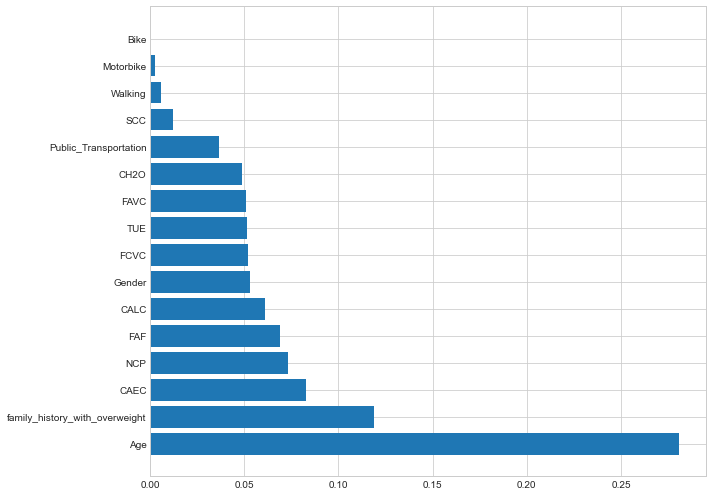

In [57]:
x = np.array(f_Scores["Feature"])
y = np.array(f_Scores["Score"])
plt.figure(figsize=(10, 7))
plt.barh(x,y, height = 0.8)
plt.show()

---
# END
Thank you :)